# QCTO - Workplace Module

### Project Title:  Time series forecasting model to predict future forest areas
#### Done By: Sarah Mahlangu

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

This project focuses on building a time series forecasting model to predict future trends in the world’s forest area, based on historical data. The primary goal is to forecast changes in both the total forest area (in square kilometers) and the percentage of land area covered by forests. This information can help policymakers, environmental organizations, and researchers understand future patterns of deforestation or afforestation and take proactive measures to protect the world’s forests. The significance of this project lies in its potential to provide insights into global forest trends, which are crucial for environmental Conservation, policy and regulation, sustainability and research.

Forests play a critical role in maintaining ecological balance, supporting biodiversity, and combating climate change through carbon sequestration. Over the years, the global forest area has been influenced by a variety of factors, including urbanization, agriculture, industrialization, and government policies on deforestation and afforestation. Understanding the trends and predicting future changes in forest area is key to addressing environmental challenges like climate change, habitat loss, and sustainability. The forest area dataset, which includes metrics on forest areasin square kilometers for different countries, offers an opportunity to analyze these trends over time and forecast future developments.

This project will seek to answer the following questions:
1. What is the future trajectory of the global forest area (in both km² and %) over the next years or decades?
2. How have different regions or countries contributed to the changes in forest area, and can we predict future patterns?

By accurately forecasting the future of the world's forest areas, this project will contribute to more informed decision-making around sustainability and conservation.

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
# Import packages

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

The World Forest Area dataset is typically sourced from reputable organizations involved in global environmental monitoring such as the World Bank. The exact dataset used in this project can be found on Kaggle through the following link.
https://www.kaggle.com/datasets/webdevbadger/world-forest-area

Dataset Overview:

The dataset spans several decades from 1990 to 2021, with yearly data points available for analysis. It also includes all countries in the world.
The data contains both numerical and categorical data.

Categorical data: Country name and country code.

Numerical Data: Total Forest Area in km² (The actual area of forested land within a given country) for each year from 1990 to 2021.

Challenges in the Data:

Missing Data: Some countries have missing data for certain years, which can require imputation or other techniques to handle in time series forecasting models.

Geographical Discrepancies: Some regions may have highly variable data quality due to different levels of monitoring or reporting capabilities.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [36]:
# loading dataset

df = pd.read_csv('forest_area_km.csv')

In [37]:
# View sample of the dataset

df.head(20)

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,12084.4,12084.400,12084.400,12084.400,12084.400,12084.40,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.400,12084.40,12084.4,12084.4,12084.400
1,Albania,ALB,7888.0,7868.500,7849.000,7829.500,7810.000,7790.50,7771.000,7751.500,7732.000,7712.500,7693.000,7705.770,7718.540,7731.310,7744.080,7756.850,7769.620,7782.390,7795.160,7807.930,7820.700,7834.935,7849.170,7863.405,7877.640,7891.875,7891.800,7889.025,7889.00,7889.0,7889.0,7889.000
2,Algeria,DZA,16670.0,16582.000,16494.000,16406.000,16318.000,16230.00,16142.000,16054.000,15966.000,15878.000,15790.000,16129.000,16468.000,16807.000,17146.000,17485.000,17824.000,18163.000,18502.000,18841.000,19180.000,19256.000,19332.000,19408.000,19484.000,19560.000,19560.000,19430.000,19300.00,19390.0,19490.0,19583.333
3,American Samoa,ASM,180.7,180.360,180.020,179.680,179.340,179.00,178.660,178.320,177.980,177.640,177.300,177.000,176.700,176.400,176.100,175.800,175.500,175.200,174.900,174.600,174.300,174.000,173.700,173.400,173.100,172.800,172.500,172.200,171.90,171.6,171.3,171.000
4,Andorra,AND,160.0,160.000,160.000,160.000,160.000,160.00,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.000,160.00,160.0,160.0,160.000
5,Angola,AGO,792627.8,791073.630,789519.460,787965.290,786411.120,784856.95,783302.780,781748.610,780194.440,778640.270,777086.100,771535.490,765984.880,760434.270,754883.660,749333.050,743782.440,738231.830,732681.220,727130.610,721580.000,716029.380,710478.760,704928.140,699377.520,693826.900,688276.200,682725.700,677175.10,671624.4,666073.8,660523.133
6,Antigua and Barbuda,ATG,101.1,100.440,99.780,99.120,98.460,97.80,97.140,96.480,95.820,95.160,94.500,93.830,93.160,92.490,91.820,91.150,90.480,89.810,89.140,88.470,87.800,87.140,86.480,85.820,85.160,84.500,83.800,83.200,82.50,81.8,81.2,80.533
7,Argentina,ARG,352040.0,350214.000,348388.000,346562.000,344736.000,342910.00,341084.000,339258.000,337432.000,335606.000,333780.000,330616.000,327452.000,324288.000,321124.000,317960.000,314796.000,311632.000,308468.000,305304.000,302140.000,299906.000,297672.000,295438.000,293204.000,290970.000,290100.000,288990.000,287910.00,286810.0,285730.0,284636.667
8,Armenia,ARM,NaN,NaN,3343.120,3341.030,3338.940,3336.85,3334.760,3332.670,3330.580,3328.490,3326.400,3324.320,3322.240,3320.160,3318.080,3316.000,3313.920,3311.840,3309.760,3307.680,3305.600,3303.520,3301.440,3299.360,3297.280,3295.200,3293.100,3291.000,3288.90,3286.8,3284.7,3282.600
9,Aruba,ABW,4.2,4.200,4.200,4.200,4.200,4.20,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.200,4.20,4.2,4.2,4.200


In [38]:
# Summary statistics

df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2.150000e+02,2.190000e+02,2.480000e+02,2.510000e+02,2.510000e+02,2.510000e+02,2.510000e+02,2.510000e+02,2.510000e+02,2.510000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.580000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02
mean,9.839669e+05,9.632554e+05,1.795314e+06,1.771321e+06,1.767266e+06,1.763211e+06,1.759155e+06,1.755100e+06,1.751045e+06,1.746990e+06,1.729395e+06,1.726487e+06,1.723580e+06,1.720673e+06,1.717766e+06,1.714858e+06,1.700031e+06,1.697168e+06,1.694305e+06,1.691441e+06,1.688578e+06,1.666184e+06,1.656450e+06,1.653701e+06,1.650952e+06,1.648204e+06,1.645980e+06,1.642492e+06,1.639800e+06,1.636986e+06,1.634244e+06,1.631453e+06
std,2.363107e+06,2.337849e+06,5.276585e+06,5.239372e+06,5.227734e+06,5.216108e+06,5.204492e+06,5.192887e+06,5.181293e+06,5.169711e+06,5.140377e+06,5.132480e+06,5.124598e+06,5.116730e+06,5.108877e+06,5.101038e+06,5.080628e+06,5.072918e+06,5.065223e+06,5.057543e+06,5.049877e+06,5.016971e+06,5.001551e+06,4.994967e+06,4.988396e+06,4.981838e+06,4.977153e+06,4.968405e+06,4.962388e+06,4.955995e+06,4.949824e+06,4.943524e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.328300e+03,2.598345e+03,3.836765e+03,3.937705e+03,3.939040e+03,3.940375e+03,3.945110e+03,3.991520e+03,4.037930e+03,4.042000e+03,3.970000e+03,3.953000e+03,3.936000e+03,3.919000e+03,3.902000e+03,3.885000e+03,3.879000e+03,3.843300e+03,3.811170e+03,3.801535e+03,3.791900e+03,3.726310e+03,3.710940e+03,3.686760e+03,3.662580e+03,3.638400e+03,3.627500e+03,3.616650e+03,3.605750e+03,3.594900e+03,3.584000e+03,3.573133e+03
50%,5.672000e+04,4.939237e+04,4.680975e+04,4.557822e+04,4.541296e+04,4.485150e+04,4.415150e+04,4.345150e+04,4.275150e+04,4.266400e+04,4.135150e+04,4.127000e+04,4.111880e+04,4.063220e+04,4.014560e+04,3.965900e+04,3.853176e+04,3.855682e+04,3.841488e+04,3.860694e+04,3.863200e+04,3.725720e+04,3.739808e+04,3.640520e+04,3.613160e+04,3.585800e+04,3.586300e+04,3.612136e+04,3.611090e+04,3.611090e+04,3.611090e+04,3.611090e+04
75%,2.939515e+05,2.721789e+05,3.651964e+05,3.591394e+05,3.593736e+05,3.596078e+05,3.598419e+05,3.593698e+05,3.574897e+05,3.556095e+05,3.486811e+05,3.452540e+05,3.418269e+05,3.383998e+05,3.349727e+05,3.315455e+05,3.214572e+05,3.181617e+05,3.148661e+05,3.115706e+05,3.082750e+05,2.950655e+05,2.890150e+05,2.878050e+05,2.865950e+05,2.853850e+05,2.849500e+05,2.843950e+05,2.838550e+05,2.833050e+05,2.826195e+05,2.811709e+05
max,1.134854e+07,1.135040e+07,4.203424e+07,4.200109e+07,4.192261e+07,4.184413e+07,4.176565e+07,4.168717e+07,4.160869e+07,4.153021e+07,4.145927e+07,4.140713e+07,4.135499e+07,4.130285e+07,4.125071e+07,4.119857e+07,4.118001e+07,4.112832e+07,4.107663e+07,4.102495e+07,4.097326e+07,4.092840e+07,4.088353e+07,4.083866e+07,4.079379e+07,4.074891e+07,4.071630e+07,4.064787e+07,4.059955e+07,4.054878e+07,4.049969e+07,4.044947e+07


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [39]:
# Display number of rows and columns of the dataframe

df.shape

(259, 34)

There are 256 rows of data and 34 columns 

In [40]:
# Check data types and null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  259 non-null    object 
 1   Country Code  259 non-null    object 
 2   1990          215 non-null    float64
 3   1991          219 non-null    float64
 4   1992          248 non-null    float64
 5   1993          251 non-null    float64
 6   1994          251 non-null    float64
 7   1995          251 non-null    float64
 8   1996          251 non-null    float64
 9   1997          251 non-null    float64
 10  1998          251 non-null    float64
 11  1999          251 non-null    float64
 12  2000          253 non-null    float64
 13  2001          253 non-null    float64
 14  2002          253 non-null    float64
 15  2003          253 non-null    float64
 16  2004          253 non-null    float64
 17  2005          253 non-null    float64
 18  2006          255 non-null    

Several columns, especially earlier years (1990–2000), contain missing values. 
All columns are correctly recognized as object or numeric (float64).

In [41]:
# Count null values per column

df.isna().sum()

Country Name     0
Country Code     0
1990            44
1991            40
1992            11
1993             8
1994             8
1995             8
1996             8
1997             8
1998             8
1999             8
2000             6
2001             6
2002             6
2003             6
2004             6
2005             6
2006             4
2007             4
2008             4
2009             4
2010             4
2011             1
2012             0
2013             0
2014             0
2015             0
2016             0
2017             0
2018             0
2019             0
2020             0
2021             0
dtype: int64

There are a number of missing forest data in some of the years. This data needs to be imputed.

In [42]:
# Fill missing values using linear interpolation

df_interpolated = df.copy()
df_interpolated = df_interpolated.interpolate(method='linear', axis=0, limit_direction='both')

In [43]:
# Display the dataset after interpolation

df_interpolated.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,12084.4,12084.40,12084.40,12084.40,12084.40,12084.4,12084.40,12084.40,12084.40,12084.40,12084.4,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.40,12084.4,12084.400,12084.40,12084.400,12084.40,12084.400,12084.4,12084.400,12084.4,12084.4,12084.4,12084.400
1,Albania,ALB,7888.0,7868.50,7849.00,7829.50,7810.00,7790.5,7771.00,7751.50,7732.00,7712.50,7693.0,7705.77,7718.54,7731.31,7744.08,7756.85,7769.62,7782.39,7795.16,7807.93,7820.7,7834.935,7849.17,7863.405,7877.64,7891.875,7891.8,7889.025,7889.0,7889.0,7889.0,7889.000
2,Algeria,DZA,16670.0,16582.00,16494.00,16406.00,16318.00,16230.0,16142.00,16054.00,15966.00,15878.00,15790.0,16129.00,16468.00,16807.00,17146.00,17485.00,17824.00,18163.00,18502.00,18841.00,19180.0,19256.000,19332.00,19408.000,19484.00,19560.000,19560.0,19430.000,19300.0,19390.0,19490.0,19583.333
3,American Samoa,ASM,180.7,180.36,180.02,179.68,179.34,179.0,178.66,178.32,177.98,177.64,177.3,177.00,176.70,176.40,176.10,175.80,175.50,175.20,174.90,174.60,174.3,174.000,173.70,173.400,173.10,172.800,172.5,172.200,171.9,171.6,171.3,171.000
4,Andorra,AND,160.0,160.00,160.00,160.00,160.00,160.0,160.00,160.00,160.00,160.00,160.0,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.0,160.000,160.00,160.000,160.00,160.000,160.0,160.000,160.0,160.0,160.0,160.000


In [24]:
# Check for missing values after interpolation

df_interpolated.isnull().sum()

Country Name    0
Country Code    0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [44]:
# Check number of duplicate rows

num_duplicates = df_interpolated.duplicated().sum()
num_duplicates

0

There are no duplicated rows of data

In [45]:
# Detecting outliers

# Select numeric columns 
numeric_columns = df_interpolated.iloc[:, 2:]

In [46]:
# Function to detect outliers using the IQR method

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [47]:
# Detect and count outliers for each numeric column

outlier_summary = {}
for col in numeric_columns.columns:
    outliers = detect_outliers_iqr(df_interpolated, col)
    outlier_summary[col] = len(outliers)

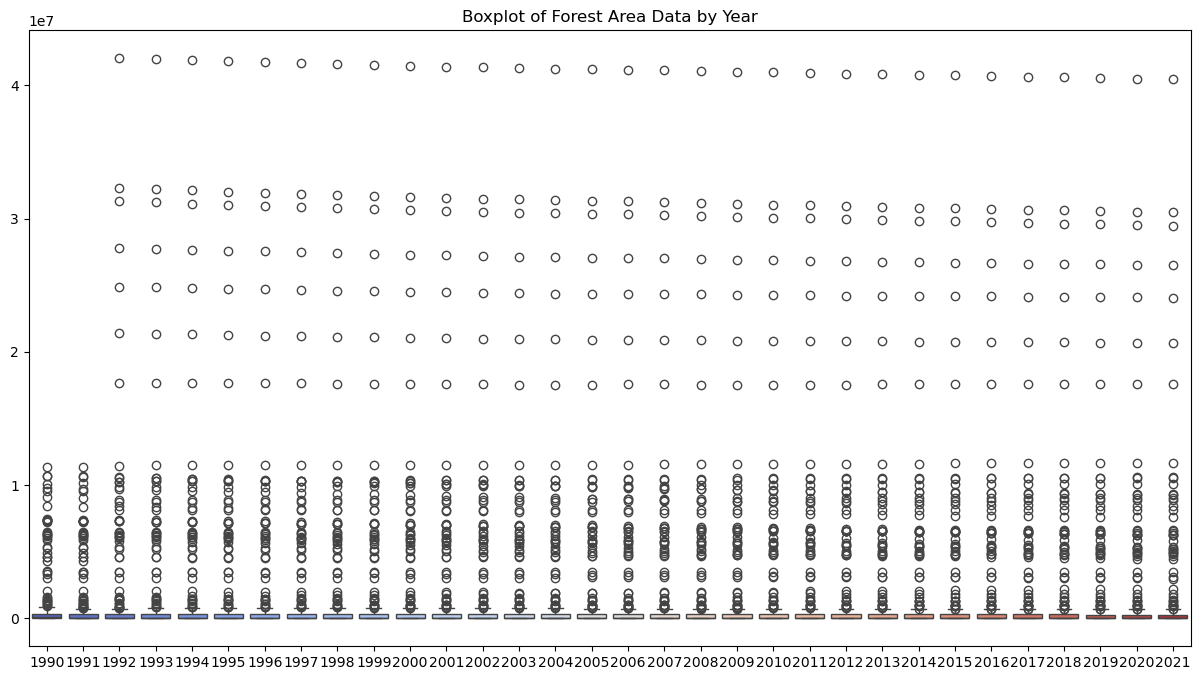

In [48]:
# Visualize outliers with boxplots

plt.figure(figsize = (15, 8))
sns.boxplot(data = numeric_columns, orient = "v", palette = "coolwarm")
plt.title("Boxplot of Forest Area Data by Year")
plt.show()

In [49]:
# Display the outlier summary

outlier_summary

{'1990': 44,
 '1991': 49,
 '1992': 50,
 '1993': 48,
 '1994': 48,
 '1995': 48,
 '1996': 48,
 '1997': 48,
 '1998': 48,
 '1999': 49,
 '2000': 49,
 '2001': 49,
 '2002': 49,
 '2003': 49,
 '2004': 49,
 '2005': 50,
 '2006': 50,
 '2007': 50,
 '2008': 50,
 '2009': 50,
 '2010': 49,
 '2011': 49,
 '2012': 49,
 '2013': 49,
 '2014': 49,
 '2015': 50,
 '2016': 50,
 '2017': 50,
 '2018': 50,
 '2019': 50,
 '2020': 50,
 '2021': 50}

In [50]:
# Remove the outliers

# Function to remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter to keep only non-outliers
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [51]:
# Apply the outlier removal function to each numeric column

cleaned_data = df_interpolated.copy()
for col in numeric_columns.columns:
    cleaned_data = remove_outliers_iqr(cleaned_data, col)

In [52]:
# Verify the dimensions before and after outlier removal

print("Original data shape:", df.shape)
print("Cleaned data shape:", cleaned_data.shape)

Original data shape: (259, 34)
Cleaned data shape: (132, 34)


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
